<a href="https://colab.research.google.com/github/baileymccluresinger/PUS2024_BSinger/blob/main/Project/WatershedQuality/NitrogenDataImport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import requests
import geopandas as gpd
import seaborn as sns

# Wetland Data Import

1. Review the tidal and nontidal DFs, determine simliar cols
2. Clean dfs and combine

### Tidal Wetlands

In [ ]:
# 'Condition of Tidal Wetlands'
tidal = pd.read_csv("https://github.com/baileymccluresinger/PUS2024_BSinger/blob/main/Project/Condition_of_Tidal_Wetlands_20241009.csv?raw=true")
tidal = tidal.rename(columns={'Final score': 'Total Score'})
#tidal['QCR'] = pd.Series(dtype='int')
tidal = tidal.loc[:, ['Site Number', 'Date', 'Classification', 'Purpose', 'Watershed', 'Sub-watershed', 'Total Score']]

print(tidal.info())
print(tidal.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Site Number     376 non-null    object 
 1   Date            376 non-null    object 
 2   Classification  375 non-null    object 
 3   Purpose         376 non-null    object 
 4   Watershed       376 non-null    object 
 5   Sub-watershed   376 non-null    object 
 6   Total Score     376 non-null    float64
dtypes: float64(1), object(6)
memory usage: 20.7+ KB
None
       Total Score
count   376.000000
mean     72.366223
std      12.642676
min      30.000000
25%      64.917500
50%      75.280000
75%      81.700000
max      94.040000


In [ ]:
#'Condition of Non-Tidal Wetlands'
nontidal = pd.read_csv("https://github.com/baileymccluresinger/PUS2024_BSinger/blob/main/Project/Condition_of_Non-Tidal_Wetlands_20241009.csv?raw=true")
nontidal = nontidal.loc[:, ['Site Number', 'Date', 'Classification', 'Purpose', 'Watershed', 'Sub-watershed', 'Total Score']]

print(nontidal.info())
print(nontidal.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Site Number     1176 non-null   object
 1   Date            1174 non-null   object
 2   Classification  753 non-null    object
 3   Purpose         1176 non-null   object
 4   Watershed       1176 non-null   object
 5   Sub-watershed   666 non-null    object
 6   Total Score     1176 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 64.4+ KB
None
       Total Score
count  1176.000000
mean     58.354592
std      26.964865
min      -2.000000
25%      33.000000
50%      67.000000
75%      83.000000
max      95.000000


In [ ]:
WetlandData = pd.concat([nontidal, tidal], ignore_index=True)

print(WetlandData.info())
print(WetlandData.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Site Number     1552 non-null   object 
 1   Date            1550 non-null   object 
 2   Classification  1128 non-null   object 
 3   Purpose         1552 non-null   object 
 4   Watershed       1552 non-null   object 
 5   Sub-watershed   1042 non-null   object 
 6   Total Score     1552 non-null   float64
dtypes: float64(1), object(6)
memory usage: 85.0+ KB
None
       Total Score
count  1552.000000
mean     61.749162
std      25.010904
min      -2.000000
25%      42.000000
50%      70.000000
75%      82.000000
max      95.000000


# HUC12 - Sub-Watersheds

In [ ]:
unique_sub_watersheds = WetlandData['Watershed'].nunique()
print(f"Number of unique values in 'Watershed' column: {unique_sub_watersheds}")

Number of unique values in 'Watershed' column: 26


### Watershed Data
Divided by Hydrologic Unit Codes (HUCs), delineated by USGS. This system divides the country into 21 regions (2-digit), 222 subregions (4-digit), 352 accounting units (6-digit), and 2,262 cataloguing units (8-digit).

We're using one level deeper - 12, which are roughly 36 sq. mi. and can be either full or partial watersheds ([Source USGS & EPA](https://www.epa.gov/rps/step-2-decide-which-watershed-units-screen#:~:text=Pre%2Ddelineated%20watershed%20units%20at,36%20square%20miles%20in%20area.))

Merging this with sub-watershed data will give us geographic regions for each wetland.


STEPS
1. Review watershed data in wetland df and HUC12 - find commonalities and discrepancies.
2. Create a map to fix similar but differently spelled names (aka syns)
3. Merge Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
HUC12 = pd.read_csv("/content/drive/MyDrive/SPPA704 - Urban Data Science/Project/HUC_12.csv")
HUC12.rename(columns={'NAME': 'Sub-watershed'}, inplace=True)
print(HUC12.info())
print(HUC12.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OBJECTID              365 non-null    int64  
 1   TNMID                 365 non-null    object 
 2   METASOURCEID          38 non-null     object 
 3   SOURCEDATADESC        0 non-null      float64
 4   SOURCEORIGINATOR      0 non-null      float64
 5   SOURCEFEATUREID       0 non-null      float64
 6   LOADDATE              365 non-null    object 
 7   GNIS_ID               0 non-null      float64
 8   AREAACRES             365 non-null    int64  
 9   AREASQKM              365 non-null    float64
 10  STATES                365 non-null    object 
 11  HUC12                 365 non-null    int64  
 12  Sub-watershed         365 non-null    object 
 13  HUTYPE                365 non-null    object 
 14  HUMOD                 365 non-null    object 
 15  TOHUC                 3

In [ ]:
#Groupings based https://delawarewatersheds.org/
#visual  - https://delawarewatersheds.org/wp-content/uploads/2013/12/DE_HUC12.pdf


#Creating subsets in case we need to look at larger basins - what watersheds fall within them

inland_bays_basin = {
    "Rehoboth Bay Area": ["Rehoboth Bay", "Lewes-Rehoboth Canal"],
    "Indian River Bay Area": ["Indian River", "Iron Branch", "Indian River Bay", "Buntings Branch"],
    "Assawoman Bay Area": ["Little Assawoman", "Assawoman"]
}

delaware_bay_basin = {
    "Northern Delaware": ["Appoquinimink River", "Army Creek", "Blackbird Creek", "Red Lion Creek", "Dragon Run Creek"],
    "Central Delaware": ["Smyrna River", "Leipsic River", "Little Creek", "St. Jones River"],
    "Southern Delaware": ["Broadkill River", "Cedar Creek", "Delaware Bay Drainage", "Delaware River Drainage", "Mispillion River", "Murderkill River"]
}

chesapeake_bay_basin = {
    "Subwatersheds": [
        "Bohemia Creek", "Broad Creek", "C & D Canal West", "Chester River",
        "Choptank River", "Deep Creek", "Elk Creek", "Gravelly Branch",
        "Gum Branch", "Marshyhope Creek", "Nanticoke River", "Perch Creek",
        "Pocomoke River", "Sassafras River", "Wicomico"
    ]
}

piedmont_basin = {
    "Subwatersheds": [
        "Brandywine Creek", "Christina River", "Naamans Creek",
        "Red Clay Creek", "Shellpot Creek", "White Clay Creek"
    ]
}

delaware_bay_basin

{'Northern Delaware': ['Appoquinimink River',
  'Army Creek',
  'Blackbird Creek',
  'Red Lion Creek',
  'Dragon Run Creek'],
 'Central Delaware': ['Smyrna River',
  'Leipsic River',
  'Little Creek',
  'St. Jones River'],
 'Southern Delaware': ['Broadkill River',
  'Cedar Creek',
  'Delaware Bay Drainage',
  'Delaware River Drainage',
  'Mispillion River',
  'Murderkill River']}

In [ ]:
synonyms = {
    'shellpot creek': ['shellpot creek', 'matson run-shellpot creek', 'shellpot'],
    'c&d canal east': ['c&d canal east', 'c&d canal east-delaware river'],
    'c&d canal west-back creek': ['c&d canal - west-back creek'],
    'little assawoman bay': ['little assawoman', 'little assawoman bay'],
    'lower leipsic river': ['lower leipsic river', 'lower lepsic river'],
    'lower mispillion river': ['lower mispillion river', 'lower missipillion river'],
    'appoquinimink river': [
        'appoqiunimick river',
        'drawyer creek-appoquinimink river',
        'appoquinimink river',
        'appoqunimick river'],
    'indian river': [
        'white creek-indian river bay',
        'indian river bay-indian river inlet',
        'indian river',
        'indian river bay',
        'buntings branch',
        'iron branch'],
    'rehoboth canal-rehoboth bay': [
        'rehoboth bay',
        'lewes rehoboth bay',
        'lewes-rehoboth canal'],
    'raccoon creek' : ['racoon creek'],
    'red lion creek' :['red lion creek-delaware river'],
    'middle branch white clay creek' :['white clay creek'],
    'chapel branch-choptank river' : ['chapel branch- choptank river'],
    'little creek-broad creek' : [
        'little creek',
        'smyrna river'],
    'broad duke canal-delaware river' : ['broad dyke'],
    'simons river-delaware bay' : ['simons river'],
    'brockonbridge gut-delaware bay' : ['brockonbridge gut'],
    'little river-delaware bay' : ['little river'],
    'cedar swamp-delaware bay' :['cedar swamp'],
    'murderkill river-town of south bowers' : ['murderkill river'],
    'grecos canal-delaware bay' : ['grecos canal'],
    'lower saint jones river' : ['lower st. jones river'],
    'beaverdam creek-broadkill river' :['beaverdam creek'],
    'canary creek-broadkill river' : ['canary creek'],
    'spring  creek' : ['spring creek',],
    'middle brandywine creek' : ['brandywine'],
    'dragon creek-delaware river' :['dragon creek'],
    'army creek-delaware river' : ['army creek']
}


def apply_synonyms(name, synonym_dict):
    for standard, variants in synonym_dict.items():
        if name.strip().lower() in (variant.strip().lower() for variant in variants):
            return standard
    return name

def clean_df(df, colName, synonym_dict):
     df[colName] = df[colName].fillna('').astype(str).str.lower().str.strip()
     df[colName] = df[colName].apply(lambda x: apply_synonyms(x, synonym_dict))


clean_df(WetlandData, 'Sub-watershed', synonyms)
clean_df(HUC12, 'Sub-watershed', synonyms)

SWS_HUC12 = sorted(HUC12['Sub-watershed'])
SWS_Wetlands = sorted(WetlandData['Sub-watershed'].dropna())



In [ ]:
common_HUC12_Wetland = set(SWS_Wetlands) & set(SWS_HUC12)
Mismatch_HUC12_Wetland = set(SWS_Wetlands) - set(SWS_HUC12)

max_len = max(len(common_HUC12_Wetland), len(Mismatch_HUC12_Wetland))

# Pad all the lists to the maximum length with empty strings
data = {
    "Common (Wetland & HUC12)": list(common_HUC12_Wetland) + [''] * (max_len - len(common_HUC12_Wetland)),
    "Mismatch (Wetland & HUC12)": list(Mismatch_HUC12_Wetland) + [''] * (max_len - len(Mismatch_HUC12_Wetland))
}

df = pd.DataFrame(data)
print(df)


                 Common (Wetland & HUC12) Mismatch (Wetland & HUC12)
0                          red lion creek                           
1                     upper leipsic river                           
2   murderkill river-town of south bowers                           
3          gravelly branch-choptank river                           
4          brockonbridge gut-delaware bay                           
5                little creek-broad creek                           
6         beaverdam creek-broadkill river                           
7                    little assawoman bay                           
8                   upper sassafras river                           
9                          shellpot creek                           
10                           indian river                           
11                middle brandywine creek                           
12              simons river-delaware bay                           
13                middle mispillio

In [ ]:
print(WetlandData.head())
print()
print()
print(HUC12.head())

  Site Number        Date Classification     Purpose            Watershed  \
0    APPO3302  07/09/2015        Natural  Assessment  Appoquinimink River   
1    APPO3303  08/18/2015        Natural  Assessment  Appoquinimink River   
2    APPO3304  06/08/2015        Natural  Assessment  Appoquinimink River   
3    APPO3306  08/10/2015        Natural  Assessment  Appoquinimink River   
4    APPO3307  06/17/2015        Natural  Assessment  Appoquinimink River   

         Sub-watershed  Total Score  
0  appoquinimink river         88.0  
1      blackbird creek         92.0  
2      blackbird creek         89.0  
3      blackbird creek         90.0  
4      blackbird creek         95.0  


   OBJECTID                                   TNMID METASOURCEID  \
0         1  {A462BFFC-6E58-472A-9996-D8EE655030A4}          NaN   
1         2  {CF352971-E29C-4525-9F38-DB83BFC08201}          NaN   
2         3  {404E76F0-3451-496F-8041-8709888DDAF0}          NaN   
3         4  {B54B007C-BB51-4226-B1

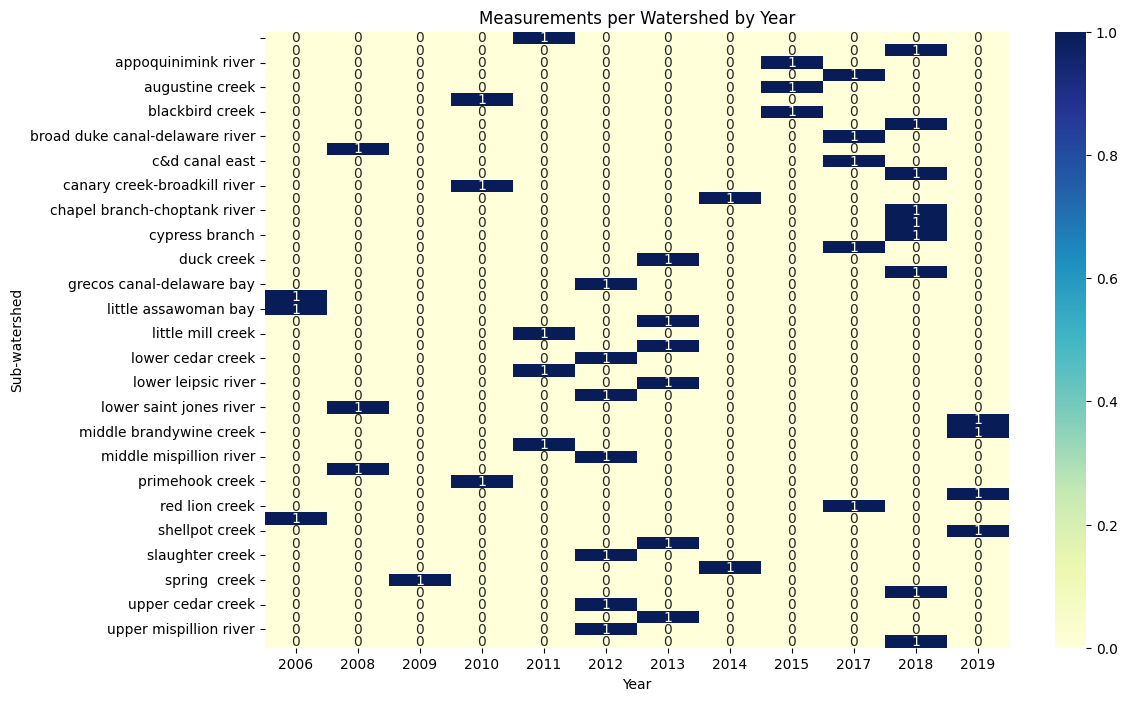

In [ ]:
WetlandData2 = WetlandData.groupby('Sub-watershed').first().reset_index()
WetlandData2['Year'] = pd.to_datetime(WetlandData2['Date']).dt.year
counts_per_year_watershed = WetlandData2.groupby(['Sub-watershed', 'Year']).size().unstack(fill_value=0)


plt.figure(figsize=(12, 8))
sns.heatmap(counts_per_year_watershed, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Measurements per Watershed by Year')
plt.ylabel('Sub-watershed')
plt.xlabel('Year')
plt.show()


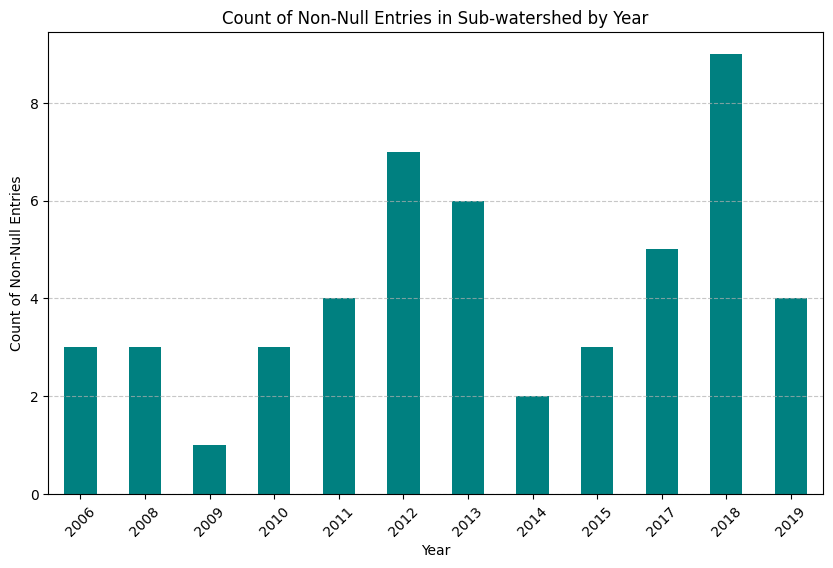

In [ ]:
WetlandData2['Year'] = pd.to_datetime(WetlandData2['Date']).dt.year
yearly_counts = WetlandData2.groupby('Year')['Sub-watershed'].count()

plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='teal')
plt.title('Count of Non-Null Entries in Sub-watershed by Year')
plt.xlabel('Year')
plt.ylabel('Count of Non-Null Entries')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




In [ ]:
WetlandData2['Year'] = pd.to_datetime(WetlandData2['Date']).dt.year
data_2018 = WetlandData2[WetlandData2['Year'] == 2018]
nan_count_2018 = data_2018['Sub-watershed'].isna().sum()
nan_count_2018

0

In [ ]:
sub_watershed_counts = data_2018.groupby('Sub-watershed').size()
multiple_entries = sub_watershed_counts[sub_watershed_counts > 1]
multiple_entries

,0
Sub-watershed,


# SpatioTemporal Analysis - HUC12

1. Figure out how to map it
2. See how scores change over time
3. Dope if you get both in a map

In [ ]:
# Construct the query URL for the API - gave chatgbt the API and asked how to load it
url = "https://enterprise.firstmap.delaware.gov/arcgis/rest/services/Hydrology/DE_Watersheds/MapServer/5/query"
params = {
    'where': '1=1',
    'outFields': '*',
    'outSR': '4326',
    'f': 'geojson'
}

response = requests.get(url, params=params)
gdf = gpd.GeoDataFrame.from_features(response.json(), crs='EPSG:4326')

print(gdf.head())
print(gdf.crs)


                                            geometry  OBJECTID  \
0  POLYGON ((-75.43456 39.78975, -75.44558 39.797...         1   
1  POLYGON ((-76.23539 38.8089, -76.23653 38.8099...         2   
2  POLYGON ((-76.0542 38.7884, -76.05482 38.7883,...         5   
3  POLYGON ((-76.10001 39.00446, -76.10185 39.004...         6   
4  POLYGON ((-76.03651 39.32178, -76.03845 39.322...        15   

                                    TNMID  \
0  {A462BFFC-6E58-472A-9996-D8EE655030A4}   
1  {CF352971-E29C-4525-9F38-DB83BFC08201}   
2  {8E6414A4-0396-4085-8A3E-F8FC2CF2DA44}   
3  {1C64393A-90D1-4478-A26A-0B1B15D7156A}   
4  {7808DB40-573D-4964-B0B1-BF7D2E6904BA}   

                             METASOURCEID SOURCEDATADESC SOURCEORIGINATOR  \
0                                    None           None             None   
1                                    None           None             None   
2                                    None           None             None   
3                       

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   geometry              365 non-null    geometry
 1   OBJECTID              365 non-null    int64   
 2   TNMID                 365 non-null    object  
 3   METASOURCEID          38 non-null     object  
 4   SOURCEDATADESC        0 non-null      object  
 5   SOURCEORIGINATOR      0 non-null      object  
 6   SOURCEFEATUREID       0 non-null      object  
 7   LOADDATE              365 non-null    int64   
 8   GNIS_ID               0 non-null      object  
 9   AREAACRES             365 non-null    int64   
 10  AREASQKM              365 non-null    float64 
 11  STATES                365 non-null    object  
 12  HUC12                 365 non-null    object  
 13  NAME                  365 non-null    object  
 14  HUTYPE                365 non-null    object  
 15

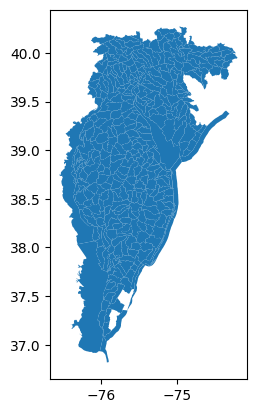

In [ ]:
HUC12_gdf = gdf.merge(HUC12[['OBJECTID','Sub-watershed']], on='OBJECTID', how='left')
HUC12_gdf.plot()
print(HUC12_gdf.info())
print(HUC12_gdf.describe())
print(HUC12_gdf.head())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   geometry              1462 non-null   geometry
 1   OBJECTID              1462 non-null   float64 
 2   TNMID                 1462 non-null   object  
 3   METASOURCEID          108 non-null    object  
 4   SOURCEDATADESC        0 non-null      object  
 5   SOURCEORIGINATOR      0 non-null      object  
 6   SOURCEFEATUREID       0 non-null      object  
 7   LOADDATE              1462 non-null   float64 
 8   GNIS_ID               0 non-null      object  
 9   AREAACRES             1462 non-null   float64 
 10  AREASQKM              1462 non-null   float64 
 11  STATES                1462 non-null   object  
 12  HUC12                 1462 non-null   object  
 13  NAME                  1462 non-null   object  
 14  HUTYPE                1462 non-null   object  
 

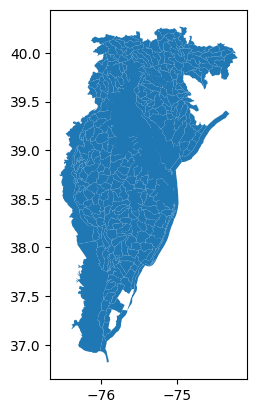

In [ ]:
wetlands_gdf = HUC12_gdf.merge(WetlandData, on='Sub-watershed', how='outer')
wetlands_gdf.plot()
print(wetlands_gdf.info())
print(wetlands_gdf.describe())
print(wetlands_gdf.head())

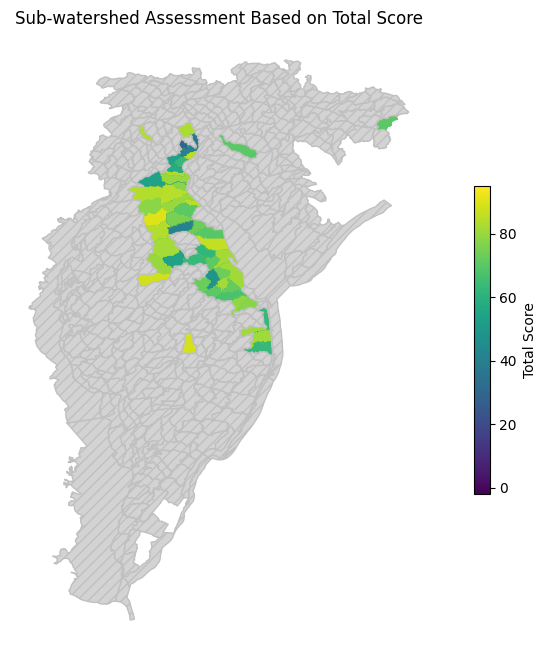

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

wetlands_gdf.plot(ax=ax, column='Total Score', cmap='viridis', legend=True,
                  legend_kwds={'shrink': 0.5, 'label': 'Total Score'},
                  missing_kwds={'color': 'lightgrey', 'edgecolor': 'silver', 'hatch': '///', 'label': 'No data'})

plt.title('Sub-watershed Assessment Based on Total Score')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('off')
plt.show()



# HUC10 - Watersheds

In [ ]:
unique_watersheds = WetlandData['Watershed'].nunique()
print(f"Number of unique values in 'Watershed' column: {unique_watersheds}")

Number of unique values in 'Watershed' column: 26


                                            geometry  OBJECTID  \
0  POLYGON ((-75.52188 39.71309, -75.52209 39.713...        11   
1  POLYGON ((-75.48293 40.04282, -75.48371 40.042...        12   
2  POLYGON ((-74.36191 39.40873, -74.36299 39.407...        13   
3  POLYGON ((-74.85464 39.99566, -74.85539 39.995...        14   
4  MULTIPOLYGON (((-76.10956 39.37005, -76.10998 ...        15   

                                    TNMID METASOURCEID SOURCEDATADESC  \
0  {F4C5076C-1D65-4250-B9E5-D3B17AD0A579}         None           None   
1  {7E65030D-F1BF-441A-9AC1-5946515D6EC5}         None           None   
2  {E079BE53-499C-412C-8EB9-A85DE753E00C}         None           None   
3  {9FFE10C0-2191-4C94-B586-760451F9C52F}         None           None   
4  {D16AF4CF-0E38-46BB-BD9A-55CCA88F6C59}         None           None   

  SOURCEORIGINATOR SOURCEFEATUREID       LOADDATE GNIS_ID  AREAACRES  \
0             None            None  1351063656000    None      50506   
1             None  

<Axes: >

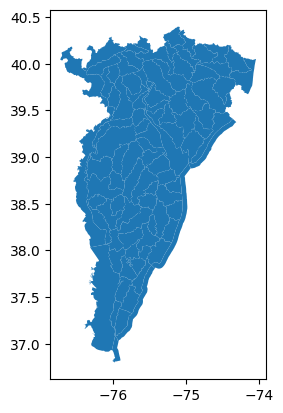

In [ ]:
url2 = "https://enterprise.firstmap.delaware.gov/arcgis/rest/services/Hydrology/DE_Watersheds/MapServer/4/query/"

response2 = requests.get(url2, params=params)
HUC10gdf = gpd.GeoDataFrame.from_features(response2.json(), crs='EPSG:4326')
HUC10gdf.rename(columns={'NAME': 'Watershed'}, inplace=True)

print(HUC10gdf.head())
print(HUC10gdf.crs)
HUC10gdf.plot()

In [ ]:
pd.set_option('display.max_rows', None)
print(HUC10gdf['Watershed'])

0                          C&D Canal - Red Lion Creek
1                        Raccoon Creek-Delaware River
2                 Great Egg Harbor Bay-Atlantic Ocean
3                         South Branch Rancocas Creek
4                                Upper Chesapeake Bay
5                                         Eastern Bay
6                           Deep Creek-Pocomoke Sound
7                                       Manokin River
8                       Dividing Creek-Pocomoke River
9                                     Middle Choptank
10                         Salem River-Delaware River
11                                     Tuckahoe River
12                              Lower Neshaminy Creek
13                       Upper Great Egg Harbor River
14                                       Wading River
15                                       Barnegat Bay
16                                    Conestoga River
17                               Magothy Bay-Cobb Bay
18                    Machip

In [ ]:
synonyms2 = {
    'leipsic river-delaware bay': [
        'lower lepsic river',
        'leipsic river',
        'leipsic',
        'lower leipsic river'],
    'mispillion river-delaware bay': [
        'lower mispillion river',
        'lower missipillion river',
        'mispillion',
        'lower mispillion river',
        'mispillion river',
        'lower mispillion river'],
    'appoquinimink river-delaware river': [
        'appoqiunimick river',
        'drawyer creek-appoquinimink river',
        'appoquinimink river',
        'appoqunimick river',
        'appoquinimink river',
        'appoquinimink'],
    'c&d canal - red lion creek' :[
        'red lion creek-delaware river',
        'red lion creek',
        'red lion'],
    'smyrna river-delaware bay' :[
        'smyrna river',
        'smyrna'],
    'murderkill river-delaware bay' : [
        'murderkill river',
        'murderkill'],
    'saint jones river' : [
        'lower st. jones river',
        'st. jones river',
        'st. jones',
        'lower saint jones river'],
    'broadkill river-delaware bay' :[
        'broadkill river',
        'broadkill'],
    'upper nanticoke river':[
        'nanticoke river'],
    "christina river":[
        'christina'],
    'brandywine creek' : ['brandywine']
}


clean_df(WetlandData, 'Watershed', synonyms2)
clean_df(HUC10gdf, 'Watershed', synonyms2)

SWS_HUC10gdf = sorted(HUC10gdf['Watershed'])
SWS_Watersheds = sorted(WetlandData['Watershed'].dropna())


In [ ]:
common_HUC10_Wetland = set(SWS_Watersheds) & set(SWS_HUC10gdf)
Mismatch_HUC10_Wetland = set(SWS_Watersheds) - set(SWS_HUC10gdf)

max_len = max(len(common_HUC10_Wetland), len(Mismatch_HUC10_Wetland))

# Pad all the lists to the maximum length with empty strings
dataHUC10 = {
    "Common (Wetland & HUC10)": list(common_HUC10_Wetland) + [''] * (max_len - len(common_HUC10_Wetland)),
    "Mismatch (Wetland & HUC10)": list(Mismatch_HUC10_Wetland) + [''] * (max_len - len(Mismatch_HUC10_Wetland))
}

df_HUC10 = pd.DataFrame(dataHUC10)
print(df_HUC10)

              Common (Wetland & HUC10) Mismatch (Wetland & HUC10)
0            smyrna river-delaware bay               indian river
1           c&d canal - red lion creek                           
2                      sassafras river                           
3                     brandywine creek                           
4                        chester river                           
5   appoquinimink river-delaware river                           
6                 upper choptank river                           
7                      christina river                           
8                            elk river                           
9        mispillion river-delaware bay                           
10        broadkill river-delaware bay                           
11                   saint jones river                           
12          leipsic river-delaware bay                           
13               upper nanticoke river                           
14       m

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geometry          1531 non-null   geometry
 1   OBJECTID          1531 non-null   float64 
 2   TNMID             1531 non-null   object  
 3   METASOURCEID      1 non-null      object  
 4   SOURCEDATADESC    0 non-null      object  
 5   SOURCEORIGINATOR  0 non-null      object  
 6   SOURCEFEATUREID   0 non-null      object  
 7   LOADDATE          1531 non-null   float64 
 8   GNIS_ID           0 non-null      object  
 9   AREAACRES         1531 non-null   float64 
 10  AREASQKM          1531 non-null   float64 
 11  STATES            1531 non-null   object  
 12  HUC10             1531 non-null   object  
 13  Watershed         1630 non-null   object  
 14  HUTYPE            1531 non-null   object  
 15  HUMOD             0 non-null      object  
 16  SHAPE.AREA      

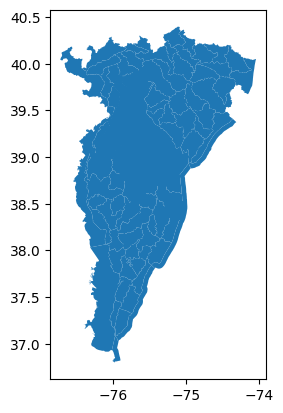

In [ ]:
wetlands_gdf2 = HUC10gdf.merge(WetlandData, on='Watershed', how='outer')
wetlands_gdf2.plot()
print(wetlands_gdf2.info())
print(wetlands_gdf2.describe())
print(wetlands_gdf2.head())

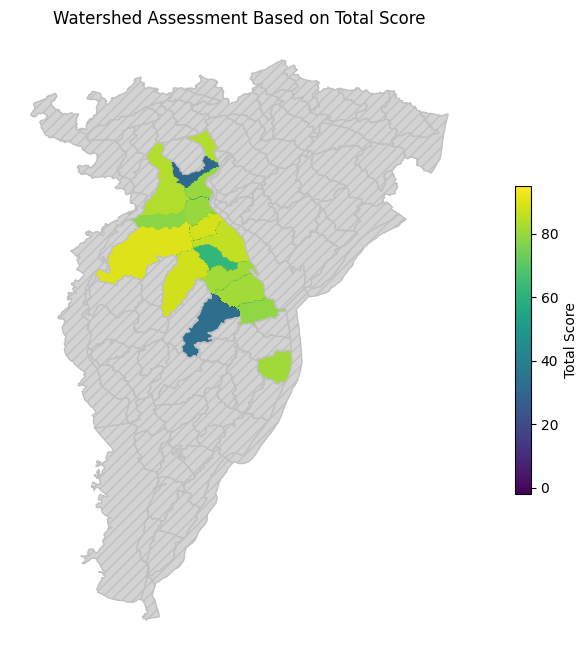

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

wetlands_gdf2.plot(ax=ax, column='Total Score', cmap='viridis', legend=True,
                   legend_kwds={'shrink': 0.5, 'label': 'Total Score'},
                   missing_kwds={'color': 'lightgrey', 'edgecolor': 'silver', 'hatch': '///', 'label': 'No data'})

plt.title('Watershed Assessment Based on Total Score')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('off')
plt.show()